## Importes

In [2]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_context('notebook')

## Configuración

In [17]:
plt.rcParams['figure.figsize'] = (9, 5)

## Objetivo del análisis

El objetivo de este análisis es identificar factores de negocio y patrones de comportamiento
asociados al churn de clientes en un servicio de telecomunicaciones, con el fin de generar
insights accionables que ayuden a reducir la cancelación de clientes.

## Fuente de datos

En este notebook se utilizan datos públicos provenientes de Kaggle:

- Telco Customer Churn Dataset
  https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Carga de datos e inspección estructural

Se realiza la carga del dataset y una inspección inicial para comprender:
- el tamaño del dataset
- los tipos de datos
- la presencia de valores faltantes
- la variable objetivo (churn)

In [16]:
df = pd.read_csv("../data/raw/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Inspección estructural

In [11]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Exploración inicial del dataset

En esta sección se realizo una inspección general del dataset Telco Customer Churn,
con el objetivo de comprender su tamaño, estructura y calidad de datos antes de
realizar análisis más profundos.


## Variable objetivo: Churn

En este dataset, la variable **Churn** indica si un cliente canceló el servicio.
Comprender su distribución es fundamental para evaluar el problema de negocio
y definir el enfoque del análisis.

In [18]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

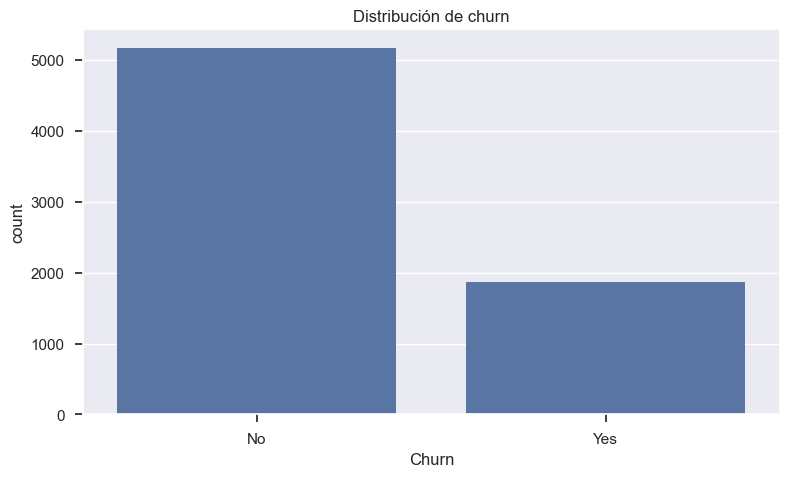

In [20]:
sns.countplot(data=df, x="Churn")
plt.title("Distribución de churn")
plt.show()

**Observación:**
El dataset muestra que aproximadamente un 26.5% de los clientes
han cancelado el servicio.

**Interpretación:**
El churn representa un problema relevante de negocio y justifica
un análisis más profundo para identificar sus principales causas.


## Calidad de datos y valores faltantes

Se analiza la presencia de valores faltantes y posibles problemas
de tipado que puedan afectar el análisis.


In [21]:
df.isnull().sum().sort_values(ascending=False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
(df.isnull().mean() * 100).sort_values(ascending=False)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

## Tipos de variables

In [23]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Las variables del dataset incluyen información demográfica,
características del servicio, tipo de contrato y comportamiento de pago.
Se identifican variables categóricas y numéricas para análisis posteriores.

## Tipo de contrato y churn

Se analiza la relación entre el tipo de contrato del cliente
y la probabilidad de churn.
En servicios de suscripción, los contratos mensuales suelen
presentar mayor churn que los contratos de largo plazo.


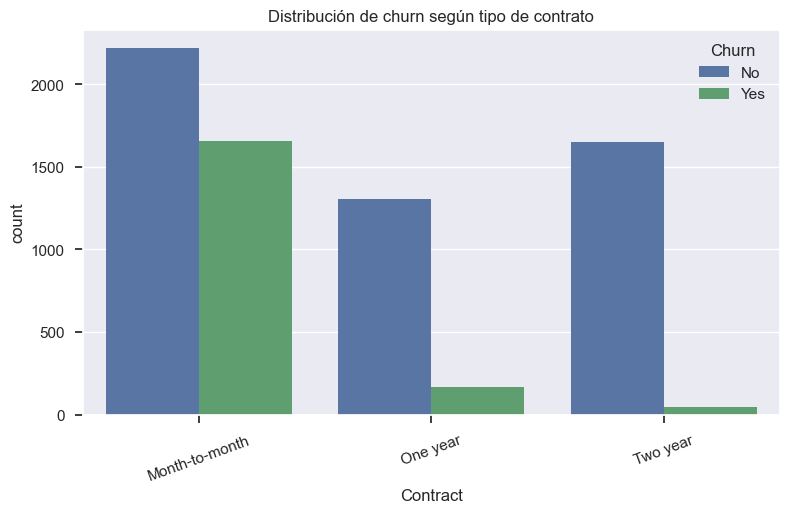

In [28]:
sns.countplot(
    data=df,
    x="Contract",
    hue="Churn"
)
plt.title("Distribución de churn según tipo de contrato")
plt.xticks(rotation=20)
plt.show()

**Observación:**
Los clientes con contrato mes a mes presentan una tasa de churn
significativamente más alta que aquellos con contratos anuales o bianuales.

**Interpretación:**
Los contratos de largo plazo funcionan como un mecanismo de retención,
mientras que los clientes sin compromiso presentan mayor propensión a cancelar.

## Antigüedad del cliente (tenure) y churn

Se analiza si los clientes con menor antigüedad
tienen mayor probabilidad de churn.

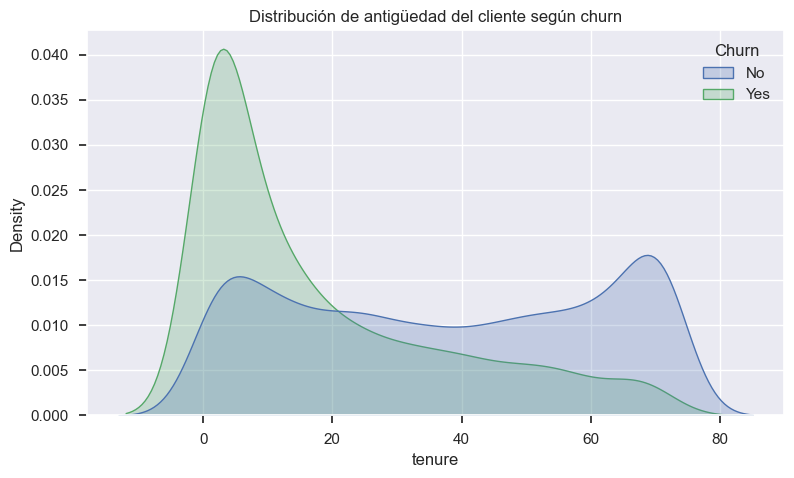

In [30]:
sns.kdeplot(
    data=df,
    x="tenure",
    hue="Churn",
    common_norm=False,
    fill=True
)
plt.title("Distribución de antigüedad del cliente según churn")
plt.show()

**Observación:**
La distribución muestra que los clientes que churnean
se concentran principalmente en valores bajos de antigüedad.

**Interpretación:**
El churn ocurre con mayor frecuencia en etapas tempranas del ciclo de vida,
lo que sugiere problemas de onboarding o expectativas no cumplidas.

## Método de pago y churn

Se evalúa si el método de pago está asociado al churn,
especialmente en relación con pagos automáticos versus manuales.

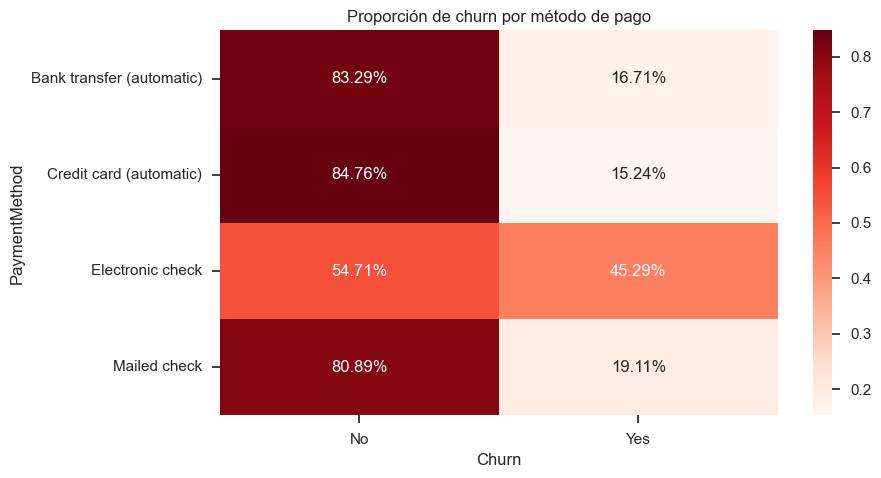

In [35]:
pivot = pd.crosstab(
    df["PaymentMethod"],
    df["Churn"],
    normalize="index"
)

sns.heatmap(
    pivot,
    annot=True,
    fmt=".2%",
    cmap="Reds"
)
plt.title("Proporción de churn por método de pago")
plt.show()

**Observación:**
Los clientes que utilizan métodos de pago manuales
presentan mayor tasa de churn que aquellos con débito automático o tarjeta.

**Interpretación:**
La fricción en el proceso de pago puede contribuir al churn,
especialmente en clientes menos comprometidos.

## Cargos mensuales (MonthlyCharges) y churn

Se analiza la relación entre el monto mensual que paga el cliente
y la probabilidad de churn, para evaluar si el precio es un factor
determinante en la cancelación del servicio.

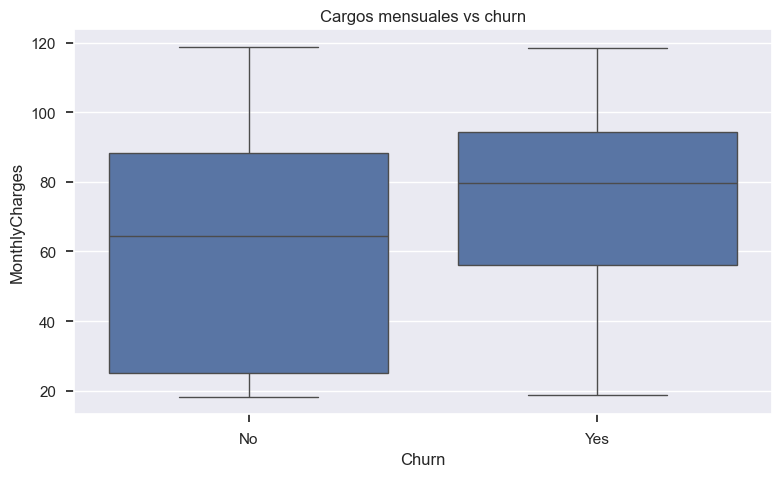

In [36]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Cargos mensuales vs churn")
plt.show()

**Observación:**
Los clientes que churnean tienden a tener cargos mensuales más altos
en comparación con los clientes que permanecen.

**Interpretación:**
Un mayor precio mensual puede aumentar la sensibilidad al churn,
especialmente si el valor percibido del servicio no acompaña el costo.

## Distribución de cargos mensuales

Se analiza la distribución de los cargos mensuales para comprender
la variabilidad de precios dentro de la base de clientes.

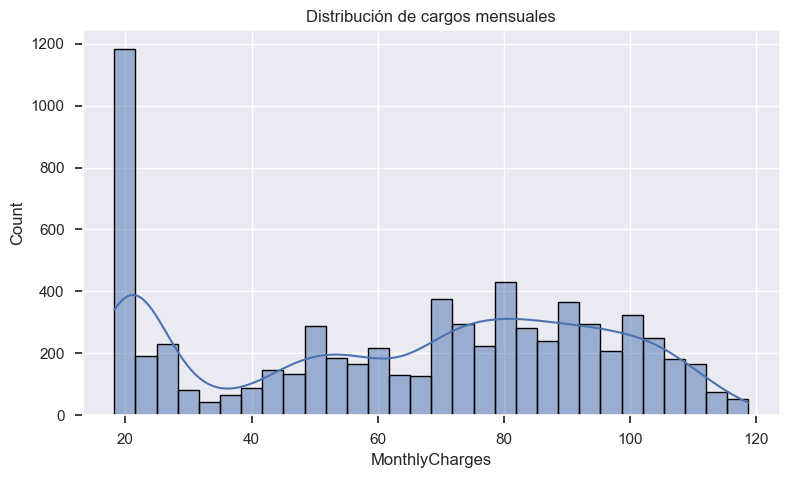

In [37]:
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Distribución de cargos mensuales")
plt.show()

**Observación:**
La distribución muestra una alta dispersión de precios,
con concentración de clientes en rangos medios y altos.

**Interpretación:**
La heterogeneidad de precios sugiere distintos perfiles de clientes
y posibles segmentos con diferente riesgo de churn.


## Cargos totales (TotalCharges) y calidad de datos

La variable TotalCharges representa el total facturado al cliente
durante su permanencia. Se analiza su relación con churn y se revisa
su calidad de datos.

In [38]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [39]:
df["TotalCharges"].isnull().sum()

np.int64(11)

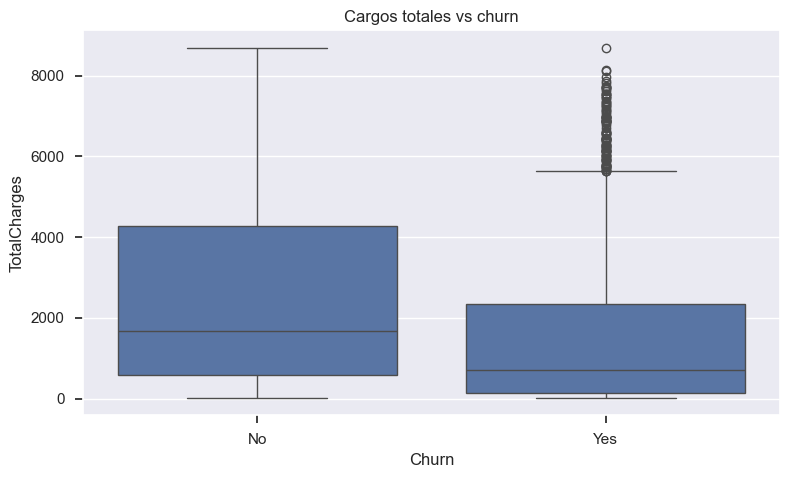

In [40]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.title("Cargos totales vs churn")
plt.show()


**Observación:**
Los clientes que churnean presentan valores de TotalCharges
significativamente más bajos.

**Interpretación:**
Esto está asociado a una menor antigüedad del cliente.
El churn ocurre principalmente en clientes recientes,
antes de acumular altos cargos totales.

## Relación entre antigüedad y cargos totales

Se analiza cómo la antigüedad del cliente influye en los cargos totales,
para contextualizar el impacto del churn temprano.

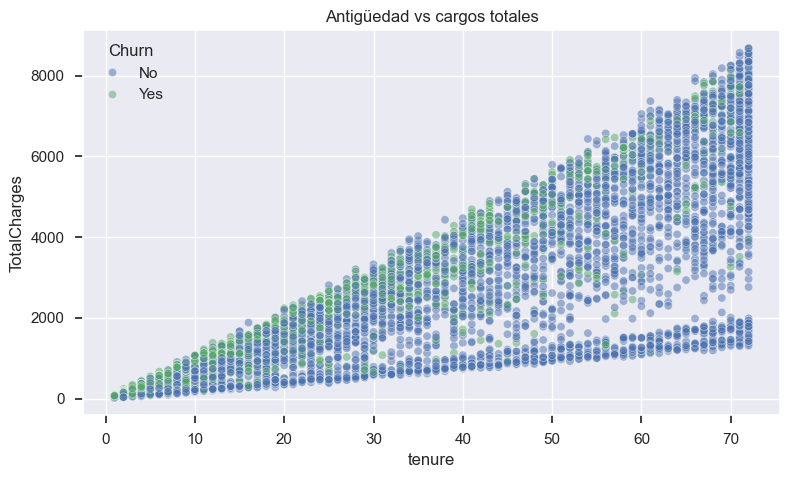

In [41]:
sns.scatterplot(
    data=df,
    x="tenure",
    y="TotalCharges",
    hue="Churn",
    alpha=0.5
)
plt.title("Antigüedad vs cargos totales")
plt.show()

**Observación:**
Existe una relación positiva entre la antigüedad del cliente
y los cargos totales acumulados.

**Interpretación:**
El churn temprano reduce significativamente el valor de vida del cliente,
lo que refuerza la importancia de estrategias de retención temprana.

## Servicios contratados y churn

Se analiza la relación entre los distintos servicios contratados
y la probabilidad de churn, con el objetivo de identificar qué
features aportan mayor retención de clientes.

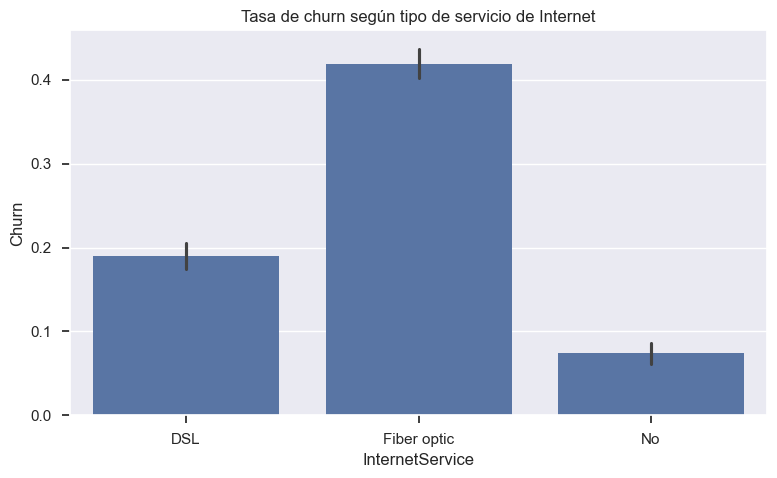

In [42]:
sns.barplot(
    data=df,
    x="InternetService",
    y=(df["Churn"] == "Yes")
)
plt.title("Tasa de churn según tipo de servicio de Internet")
plt.show()

**Observación:**
Los clientes con servicio de fibra óptica presentan una tasa de churn
más alta que aquellos con DSL o sin servicio de internet.

**Interpretación:**
Un servicio premium no garantiza menor churn.
Puede indicar expectativas altas, problemas de calidad o pricing elevado.

## Servicios de soporte y seguridad

Se evalúa si la contratación de servicios de soporte y seguridad
está asociada a una menor tasa de churn.


In [43]:
def churn_by_service(column):
    sns.barplot(
        data=df,
        x=column,
        y=(df["Churn"] == "Yes")
    )
    plt.title(f"Tasa de churn según {column}")
    plt.show()

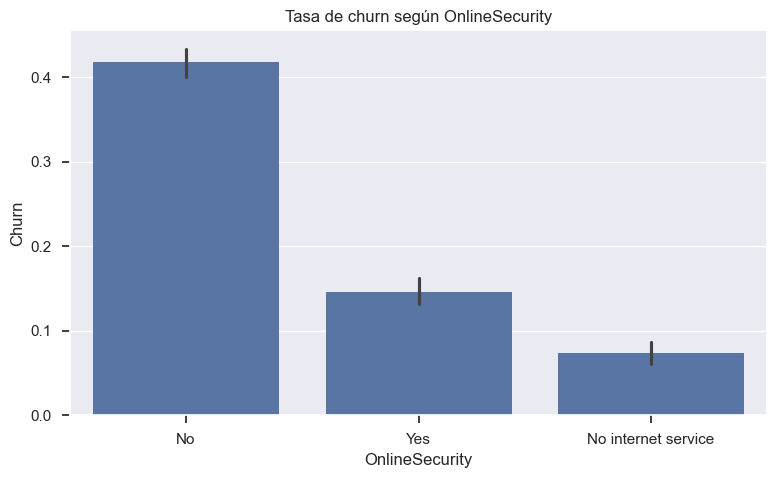

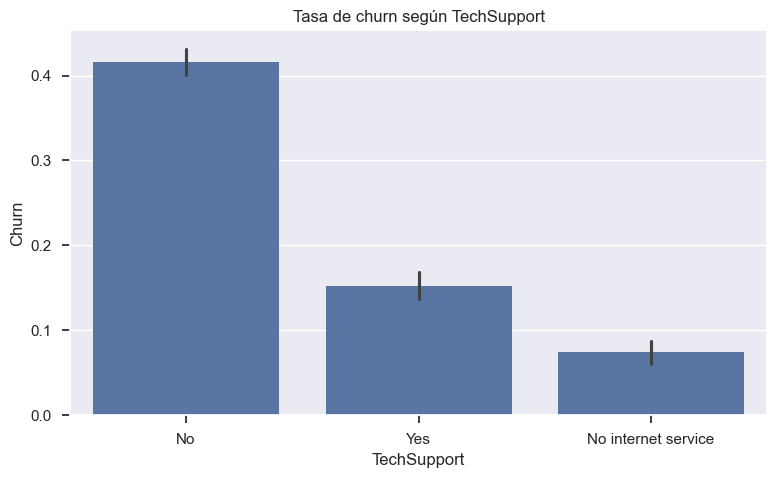

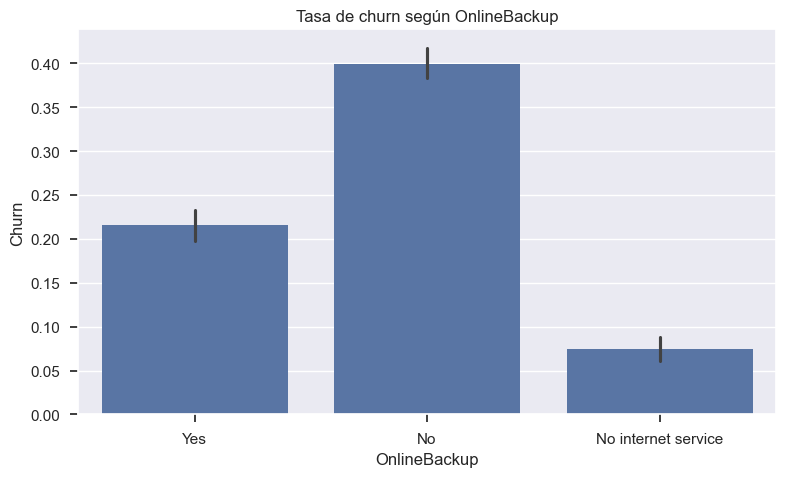

In [44]:
for service in ["OnlineSecurity", "TechSupport", "OnlineBackup"]:
    churn_by_service(service)

**Observación:**
Los clientes que no cuentan con servicios de seguridad o soporte
presentan una tasa de churn significativamente mayor.

**Interpretación:**
Estos servicios actúan como factores de retención,
aumentando el compromiso del cliente con la plataforma.

## Servicios de entretenimiento y churn

Se analiza el impacto de los servicios de streaming
sobre la probabilidad de churn.


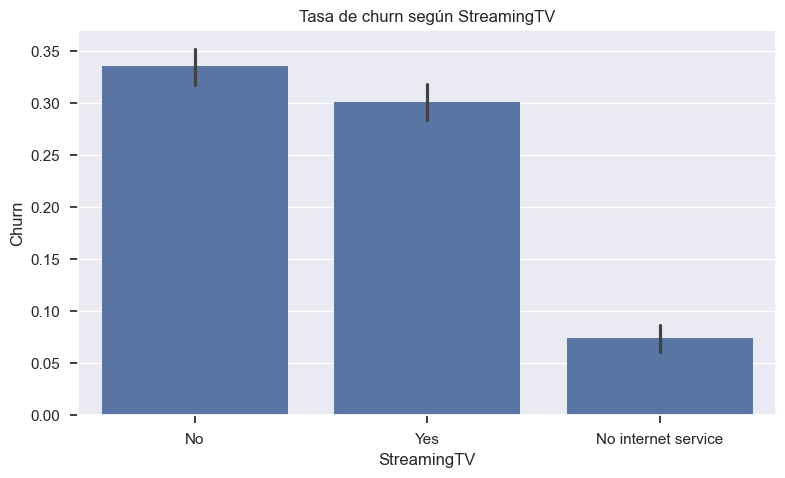

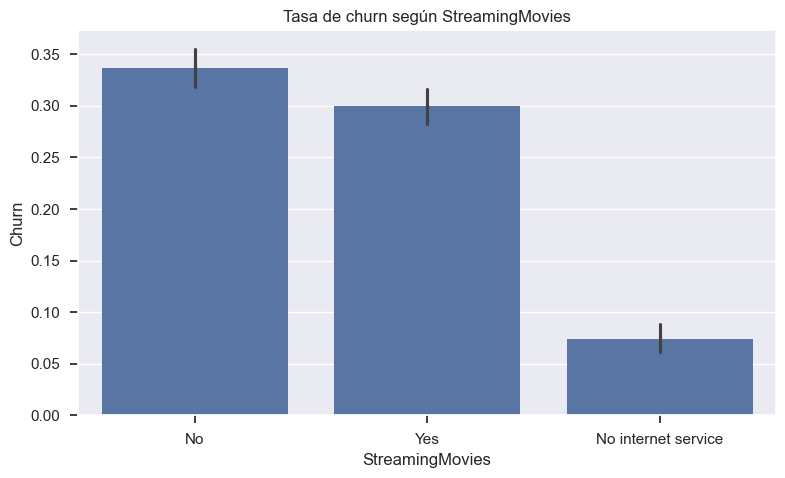

In [45]:
for service in ["StreamingTV", "StreamingMovies"]:
    churn_by_service(service)

**Observación:**
Los servicios de streaming no muestran una reducción clara del churn.

**Interpretación:**
Los servicios de entretenimiento por sí solos no generan
suficiente valor para retener clientes en este contexto.

## Insight clave: servicios y churn

Los servicios que reducen el churn no son necesariamente los más costosos,
sino aquellos que resuelven problemas críticos del cliente
(seguridad, soporte, estabilidad).

## Conclusiones generales

A partir del análisis exploratorio del dataset Telco Customer Churn,
se identificaron múltiples factores asociados a la cancelación de clientes.
El churn no responde a una única causa, sino a una combinación de
condiciones contractuales, económicas y de experiencia de servicio.

### Principales insights

- Los clientes con contratos mes a mes presentan una tasa de churn
  significativamente mayor que aquellos con contratos de largo plazo.

- El churn ocurre con mayor frecuencia en clientes con baja antigüedad,
  lo que sugiere problemas durante las primeras etapas del ciclo de vida.

- Los clientes con cargos mensuales elevados muestran mayor probabilidad
  de churn, especialmente cuando el valor percibido del servicio es bajo.

- Los métodos de pago manuales están asociados a mayor churn,
  en comparación con pagos automáticos.

- La ausencia de servicios de soporte y seguridad (TechSupport,
  OnlineSecurity) incrementa significativamente la tasa de churn.

- Los servicios de entretenimiento no muestran un impacto claro
  en la reducción del churn.

## Recomendaciones de negocio

- Incentivar contratos de largo plazo mediante descuentos o beneficios
  para reducir el churn temprano.

- Reforzar estrategias de onboarding en los primeros meses del cliente,
  asegurando una correcta adopción del servicio.

- Evaluar el pricing de planes con cargos mensuales elevados,
  alineando mejor el precio con el valor percibido.

- Promover métodos de pago automáticos para reducir fricción
  y cancelaciones involuntarias.

- Ofrecer servicios de soporte y seguridad como parte de paquetes base,
  ya que actúan como factores de retención.

## Limitaciones

- El análisis se basa en datos históricos y no incluye información
  cualitativa sobre la satisfacción del cliente.

- No se realizaron modelos predictivos, por lo que los resultados
  describen asociaciones y no causalidad.

- El dataset no incluye información sobre interacciones recientes
  con atención al cliente o calidad del servicio.

## Sugerencia de próximos pasos

- Desarrollar un modelo predictivo de churn para identificar clientes
  en riesgo de cancelación.

- Realizar segmentación de clientes para estrategias de retención
  personalizadas.

- Incorporar datos de uso, satisfacción o soporte técnico
  para enriquecer el análisis.
